In [27]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib as plot

In [28]:
# Read 2020 survey data
df_2021 = pd.read_csv('2021_rws.csv',encoding='cp1252')
df_2021

,Response ID,What year were you born?,What is your gender?,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,Which of the following best describes your current occupation?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.",...,How strongly do you agree or disagree with the following statements? - Offering remote work helps me retain employees,How strongly do you agree or disagree with the following statements? - Offering remote work helps me to recruit employees,How strongly do you agree or disagree with the following statements? - My team works well together when they work remotely,How strongly do you agree or disagree with the following statements? - I find it easy to manage employees remotely (e.g. tasking and monitoring progress),How strongly do you agree or disagree with the following statements? - I find it easy to manage poor performers remotely,How strongly do you agree or disagree with the following statements? - I feel well-prepared to manage employees remotely,How strongly do you agree or disagree with the following statements? - Managing people remotely makes me more focused on results,How strongly do you agree or disagree with the following statements? - I find it easy to contact my employees when they work remotely,"This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour. Please compare your productivity when you work remotely to when you work at your employer’s workplace. Roughly how productive are you, each hour, when you work remotely?","Now think about the productivity of the employees you manage. Roughly how productive are the employees you manage, each hour, when they work remotely?"
0,1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
1,2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 50% more productive when working remotely ...,NaN
2,3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
3,4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I’m 50% more productive when working remotely ...,I’m 50% more productive when working remotely ...
4,5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I’m 20% more productive when working remotely,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1508,1995,Male,Between 1 and 5 years,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Coup

# Examining data characteristics

In [3]:
#Get number of rows and columns
df_2021.shape

(1512, 109)

In [4]:
#Get column headers
df_2021.columns

Index(['Response ID', 'What year were you born?  ', 'What is your gender?  ',
       'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  ',
       'Which of the following best describes your industry?  ',
       'Which of the following best describes your current occupation?  ',
       'How many people are currently employed by your organisation?   ',
       'Which of the following best describes your household?  ',
       'Metro or Regional',
       'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  ',
       ...
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees',
       'How strongly do you agree or disagree with the following statements?    - Offe

In [5]:
#Check data types
df_2021.dtypes

Response ID                                                                                                                                                                                                                                                                                                                                                                                    int64
What year were you born?                                                                                                                                                                                                                                                                                                                                                                       int64
What is your gender?                                                                                                                                                                                                          

In [6]:
#Sum of each data type
df_2021.dtypes.value_counts()

object     96
float64    11
int64       2
dtype: int64

In [33]:
#Generate descriptive statistics of numerical columns
df_2021.describe()

,Response ID,What year were you born?,"Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Preparing for work and commuting","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Working","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Caring and domestic responsibilities","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Personal and family time","Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Sleep","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Preparing for work and commuting","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Working","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Caring and domestic responsibilities","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Personal and family time","Think about your experience this year. On a day when you work remotely, how many hours would you spend doing the following activities? For example, a response of ‘1’ means 1 hour. A response of ‘0.5’ means half an hour. Your responses should add to 24 hours. - Sleep",What is the biggest pay cut you would accept? Please give your answer as a percentage.
count,1512.000000,1512.000000,1509.000000,1509.000000,1495.000000,1507.000000,1500.000000,1488.000000,1509.000000,1494.000000,1505.000000,1503.000000,485.00000
mean,756.500000,1979.226190,2.245772,7.831875,2.797124,3.854672,7.393367,1.178192,8.110471,3.026171,4.335402,7.484930,0.19099
std,436.621117,11.836707,1.643633,1.931000,1.626177,1.765716,1.547390,1.949860,2.098393,1.573106,1.908772,1.567494,0.21682
min,1.000000,1957.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01000
25%,378.750000,1970.000000,1.000000,7.000000,2.000000,3.000000,7.000000,0.000000,7.000000,2.000000,3.000000,7.000000,0.05000
50%,756.500000,1980.000000,2.000000,8.000000,3.000000,4.000000,8.000000,0.500000,8.000000,3.000000,4.000000,8.000000,0.10000
75%,1134.250000,1989.000000,3.000000,8.500000,4.000000,5.000000,8.000000,1.000000,9.000000,4.000000,5.000000,8.000000,0.20000
max,1512.000000,2002.000

In [7]:
# Check for duplicates
df_2021.duplicated().sum()

0

In [8]:
# Check for null values in each column
for column in df_2021.columns:
    print(f"Column {column} has {df_2021[column].isnull().sum()} null values")

Column Response ID has 0 null values
Column What year were you born?   has 0 null values
Column What is your gender?   has 0 null values
Column How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.   has 0 null values
Column Which of the following best describes your industry?   has 0 null values
Column Which of the following best describes your current occupation?   has 0 null values
Column How many people are currently employed by your organisation?    has 0 null values
Column Which of the following best describes your household?   has 0 null values
Column Metro or Regional has 0 null values
Column Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.   has 0 null values
Column How much of your work time would you have preferred to wo

# Examining demographics

In [12]:
# Examining age
df_2021['What year were you born?  '].describe()

count    1512.000000
mean     1979.226190
std        11.836707
min      1957.000000
25%      1970.000000
50%      1980.000000
75%      1989.000000
max      2002.000000
Name: What year were you born?  , dtype: float64

In [13]:
# Examining gender
df_2021['What is your gender?  '].value_counts()

Female                    785
Male                      723
I would rather not say      3
Other                       1
Name: What is your gender?  , dtype: int64

In [14]:
# Examining most common industry types
df_2021['Which of the following best describes your industry?  '].value_counts()

Financial and Insurance                     204
Professional, Scientific and Technical      163
Education and Training                      150
Information Media and Telecommunications    149
Other Services                              132
Health Care and Social Assistance           116
Retail Trade                                 86
Construction                                 71
Administrative and Support                   70
Manufacturing                                67
Public Administration and Safety             66
Wholesale Trade                              50
Transport, Postal and Warehousing            47
Arts and Recreation                          35
Electricity, Gas, Water and Waste            28
Accommodation and Food                       27
Rental, Hiring and Real Estate               22
Mining                                       15
Agriculture, Forestry and Fishing            14
Name: Which of the following best describes your industry?  , dtype: int64

In [15]:
# Examining organization size
df_2021['How many people are currently employed by your organisation?   '].value_counts()

More than 200                        752
Between 20 and 199                   445
Between 5 and 19                     184
Between 1 and 4                       81
I am a sole trader/owner-operator     50
Name: How many people are currently employed by your organisation?   , dtype: int64

In [24]:
# Examining job longevity
df_2021['How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  '].value_counts()

More than 5 years          717
Between 1 and 5 years      618
Between 6 and 12 months    177
Name: How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  , dtype: int64

In [25]:
# Examining geographic area
df_2021['Metro or Regional'].value_counts()

Metro       1159
Regional     353
Name: Metro or Regional, dtype: int64

In [46]:
# Examining number of managers vs non-managers
df_2021['Do you manage people as part of your current job?  '].value_counts()

No     815
Yes    697
Name: Do you manage people as part of your current job?  , dtype: int64

In [30]:
# Examining time spent remote working
df_2021['Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts()

100% - I spent all of my time remote working          366
50% - I spent about half of my time remote working    182
20%                                                   142
Less than 10% of my time                              123
90%                                                   111
30%                                                   103
80%                                                   102
Rarely or never                                        97
40%                                                    85
10%                                                    77
60%                                                    68
70%                                                    56
Name: Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  , dtype: int64

<AxesSubplot:>

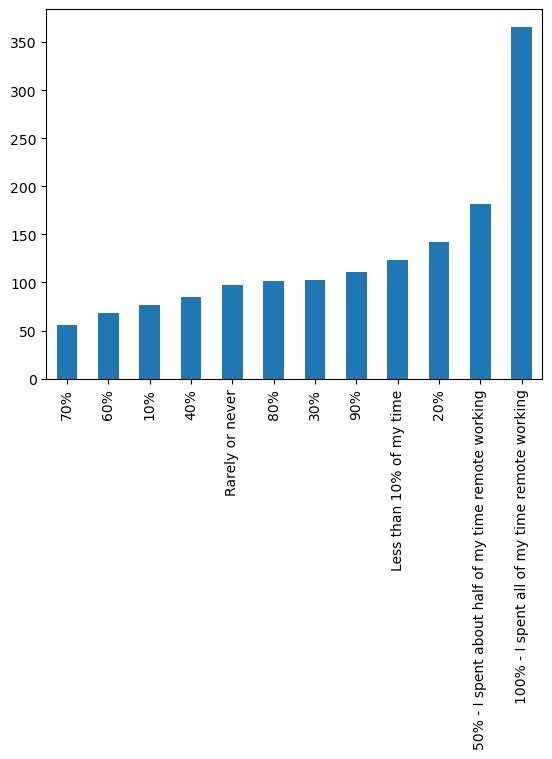

In [31]:
# Plotting distribution of time spent remote working
df_2021['Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar')

In [36]:
# Examining preferences for time spent remote working in the future
df_2021['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts()

50% - About half of my time            279
100% - All of my time                  224
20%                                    156
80%                                    129
40%                                    114
I would prefer not to work remotely    110
60%                                    106
90%                                     89
70%                                     87
30%                                     82
Less than 10% of my time                81
10%                                     55
Name: Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  , dtype: int64

<AxesSubplot:>

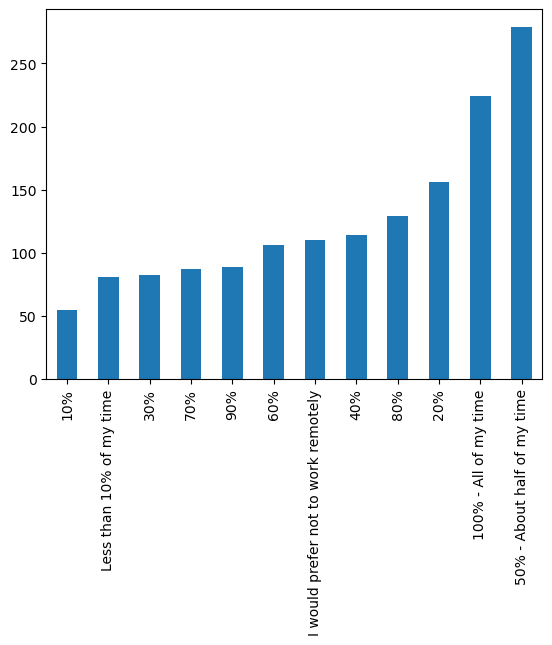

In [37]:
# Plotting distribution of preferences for time spent remote working in the future
df_2021['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '].value_counts().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '>

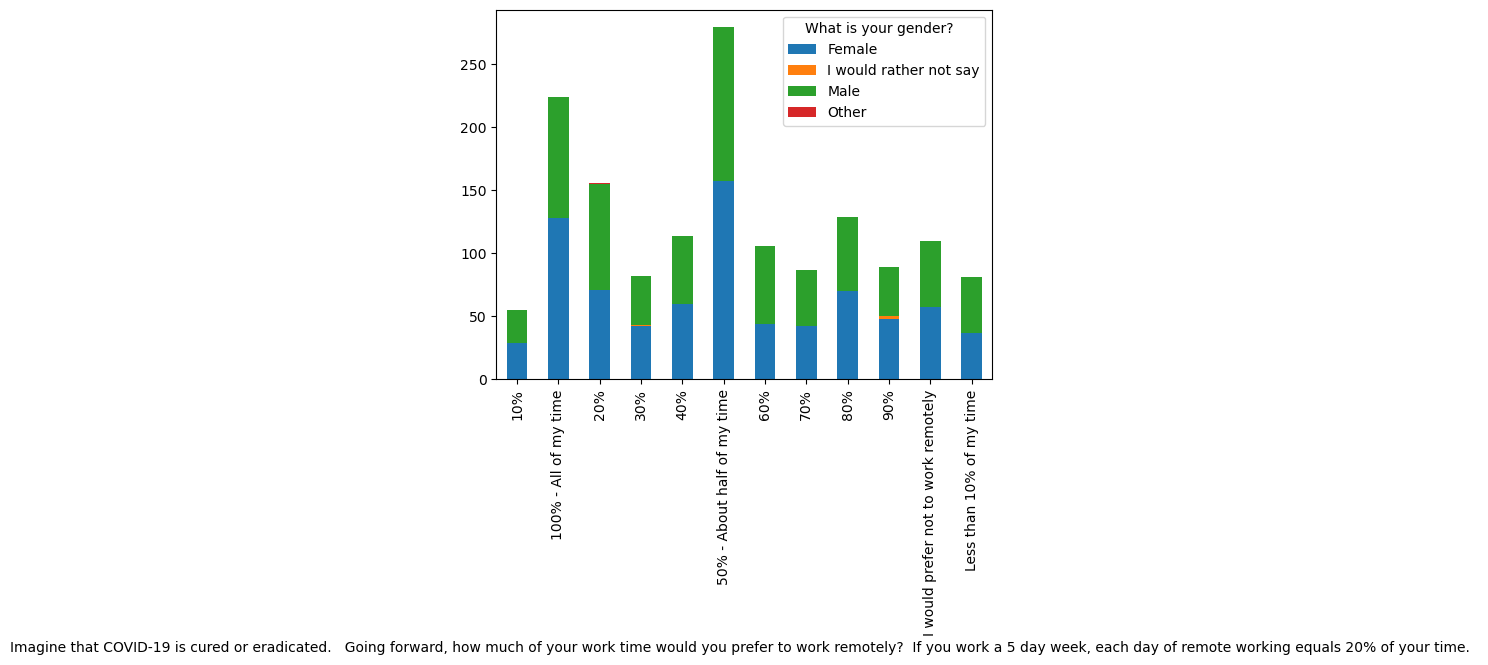

In [40]:
#Plotting preferences for remote work by gender
df_2021.groupby(['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ','What is your gender?  ']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  '>

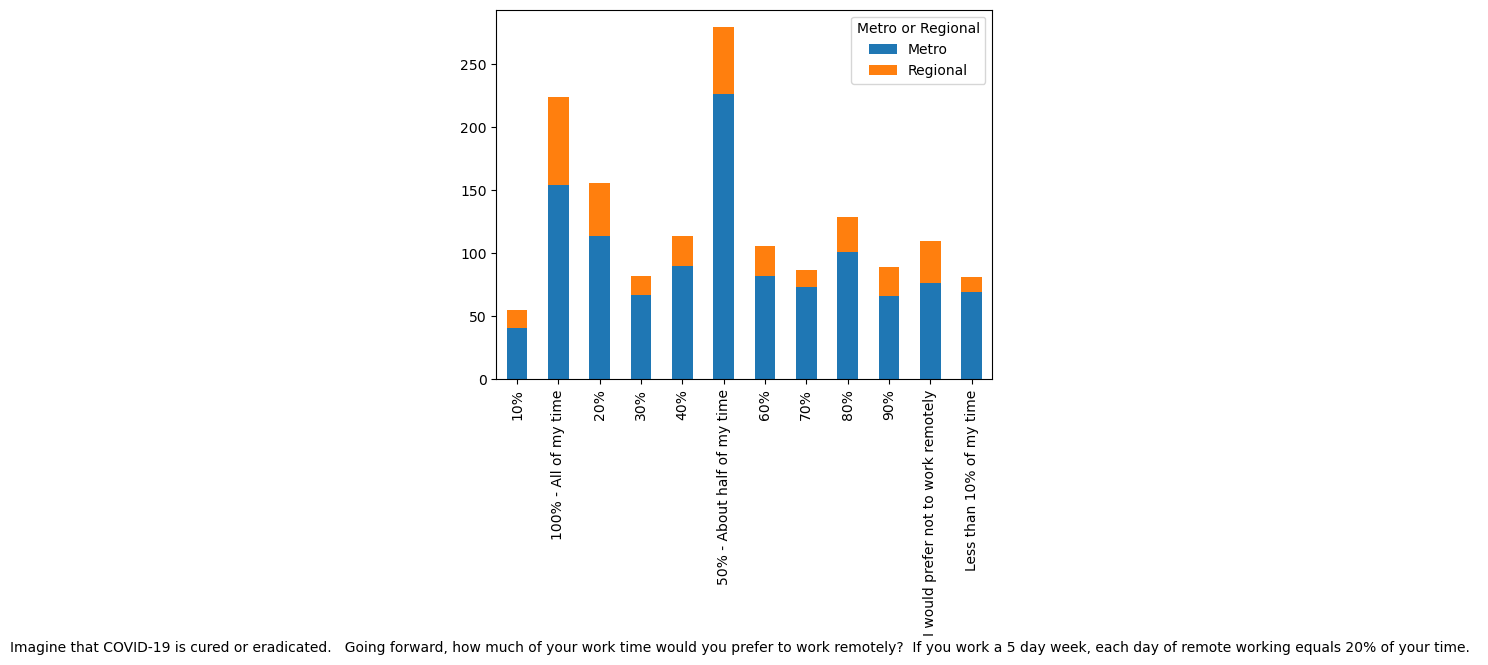

In [41]:
#Plotting preferences for remote work by geographic region
df_2021.groupby(['Imagine that COVID-19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ','Metro or Regional']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:>

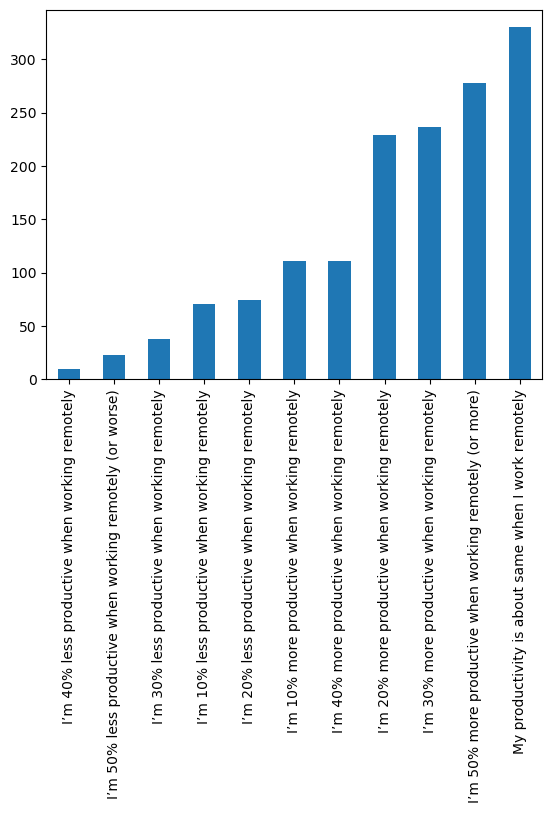

In [44]:
#Plotting productivity comparison - remote vs in-person
df_2021['This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.    Please compare your productivity when you work remotely to when you work at your employer’s workplace.    Roughly how productive are you, each hour, when you work remotely?  '].value_counts().sort_values().plot(kind='bar')
